In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import pylab as plt
import back_test_bot as bb

In [3]:
df = bb.fetch_btc_history(interval="1h", start_date="2024-01-01")

df = bb.fetch_btc_history(interval="3m", start_date="2026-01-01")

In [4]:
# Compute rolling VWAP
df["vwap"] = bb.rolling_vwap(df, window=12)

In [5]:
# Detect deviations > 3%
df = bb.detect_large_moves(df, threshold=0.008)

In [6]:
df = bb.trade_direction(df)

In [7]:
df = bb.best_bot(df)

In [8]:
df_sample = df.tail(200)

In [9]:
def plot_trade_events(df):
    fig, ax = plt.subplots(figsize=(10,8))
    df.plot(ax=ax, x='timestamp',y='price')
    df.plot(ax=ax, x='timestamp',y='deviation',secondary_y=True,alpha=0.2,ls='-.')
    df.plot(ax=ax, x='timestamp',y='vwap',color='k',ls=':')
    df[df['trade']=='Buy'].plot.scatter(ax=ax, x='timestamp',y='price', color='green',label = 'buy')
    df[df['trade']=='Sell'].plot.scatter(ax=ax, x='timestamp',y='price', color='red', label = "sell")
    ax.legend(ncols=5)

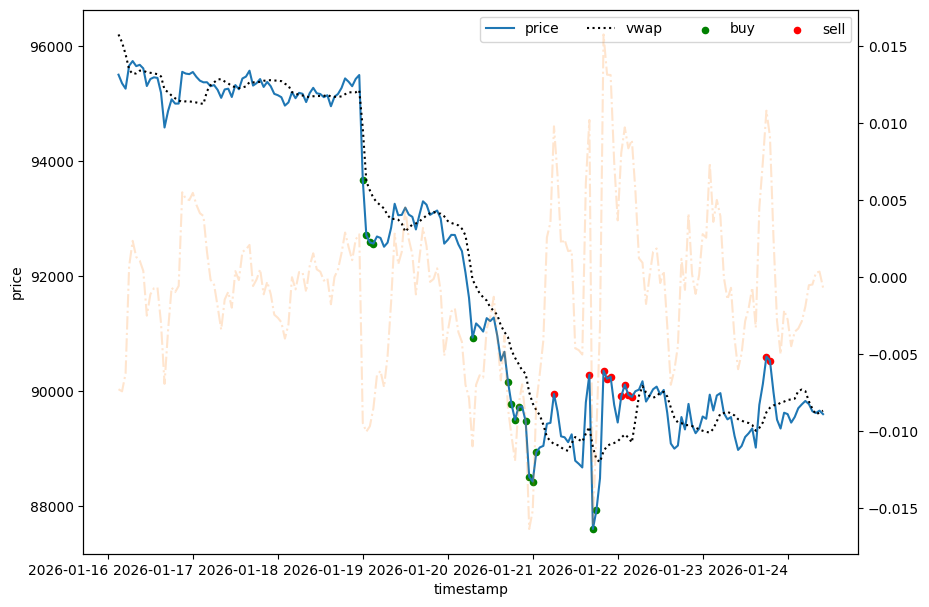

In [10]:
plot_trade_events(df_sample)

In [11]:
def plot_profit(df):
    cum_max = round(df['max_profit'].sum())
    df.plot(x='timestamp',y='max_profit', ylabel = 'Profit (USD)', title = f'Cumulative max: ${cum_max}')

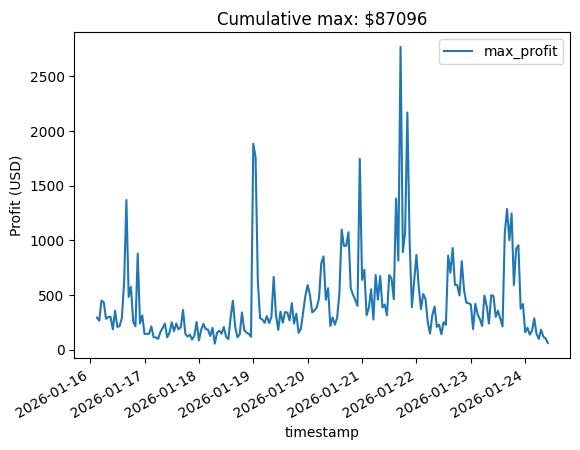

In [12]:
plot_profit(df_sample)

In [13]:
df['trade'].value_counts(normalize=True)

trade
Wait    0.764056
Sell    0.128687
Buy     0.107257
Name: proportion, dtype: float64

## Fourier transform

In [14]:
# 5. Fourier analysis
price_series = df.set_index("timestamp")["price"]
returns = bb.detrend_series(price_series, method="log_return")

In [15]:
# 14-day rolling FFT on hourly data
fft_window = 24*7
dominant_cycles = bb.dominant_cycle(
    returns,
    window=fft_window,
    sampling_interval=1.0
)

In [16]:
# Align output
cycle_df = pd.DataFrame({
    "timestamp": returns.index[fft_window:],
    "dominant_cycle_hours": dominant_cycles
})

(0.0, 24.0)

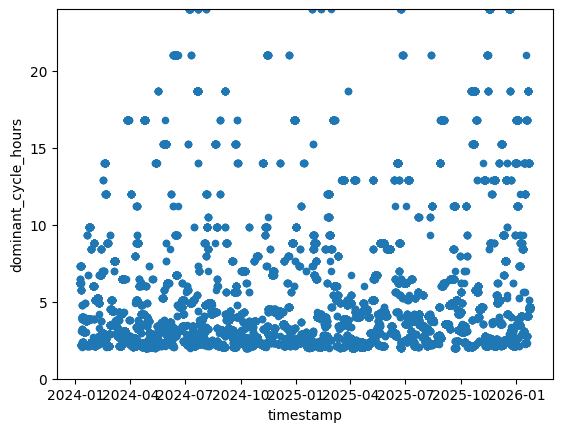

In [17]:
cycle_df.plot.scatter(x='timestamp',y='dominant_cycle_hours')
plt.ylim(0,24)

In [18]:
cycle_df.mean()

timestamp               2025-01-15 17:59:59.999000320+00:00
dominant_cycle_hours                               7.058169
dtype: object

In [19]:
cycle_df['dominant_cycle_hours'].value_counts()

dominant_cycle_hours
2.584615      475
4.097561      466
4.307692      440
8.842105      438
2.400000      424
             ... 
3.294118       71
2.947368       63
7.304348       59
10.500000      36
168.000000     27
Name: count, Length: 83, dtype: int64

In [20]:
import sys
sys.executable


'/opt/homebrew/Cellar/jupyterlab/4.4.6/libexec/bin/python'